<a href="https://colab.research.google.com/github/Matihus00/Decodificador/blob/master/Analisis_Adidas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_excel(r'C:\Users\matia\Downloads\archive (2)\Adidas US Sales Datasets.xlsx')
df.head()


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,Adidas Sales Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,NaN,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store


In [ ]:
df.columns = df.iloc[3]
df = df[4:]  # Eliminar las filas anteriores a la fila 4
df.reset_index(drop=True, inplace=True)  # Reiniciar el índice
df.head()

3,NaN,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,NaN,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
1,NaN,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
2,NaN,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
3,NaN,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
4,NaN,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store


In [ ]:
duplicados=df.duplicated().sum()
print(f"Total de filas duplicadas: {duplicados}")

Total de filas duplicadas: 0


In [ ]:
null_counts = df.isnull().sum()
print("Cantidad de valores nulos por columna:{null_counts}")


Cantidad de valores nulos por columna:{null_counts}


In [ ]:
# Crear un DataFrame a partir de la serie top_products
top_10_products_df = df.groupby('Product')['Units Sold'].sum().sort_values(ascending=False).head(10).reset_index()
top_10_products_df.columns = ['Producto', 'Unidades Vendidas']

# Aplicar estilo para resaltar filas
styled_table = top_10_products_df.style.set_table_styles(
    [{'selector': 'th', 'props': [('background-color', '1px solid black'), ('font-weight', 'bold')]},
     {'selector': 'td', 'props': [('border', '1px solid black')]}]
)

styled_table

,Producto,Unidades Vendidas
0,Men's Street Footwear,593320
1,Men's Athletic Footwear,435526
2,Women's Apparel,433827
3,Women's Street Footwear,392269
4,Women's Athletic Footwear,317236
5,Men's Apparel,306683


In [ ]:
top_10_estados_con_mayor_ventas_df = df.groupby('State')['Units Sold'].sum().sort_values(ascending=False).head(10).reset_index()
top_10_estados_con_mayor_ventas_df.columns = ['Estado', 'Unidades Vendidas']

# Aplicar estilo para resaltar filas
styled_table_zonas = top_10_estados_con_mayor_ventas_df.style.set_table_styles(
    [{'selector': 'th', 'props': [('background-color', '1px solid black'), ('font-weight', 'bold')]},
     {'selector': 'td', 'props': [('border', '1px solid black')]}]
)
styled_table_zonas


,Estado,Unidades Vendidas
0,New York,169140
1,California,163284
2,Texas,159500
3,Florida,133430
4,South Carolina,72610
5,Tennessee,66077
6,Idaho,63827
7,Alabama,63327
8,North Carolina,62936
9,Louisiana,57615


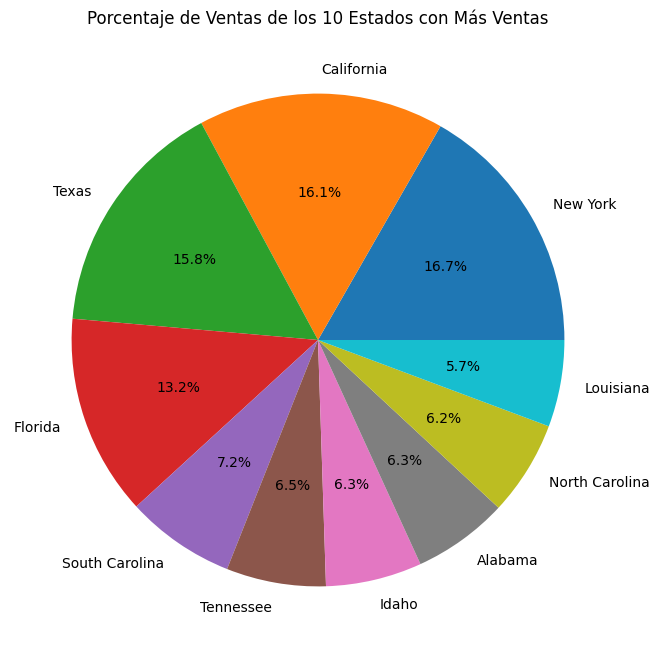

In [ ]:
# Crear una gráfica de pastel
top_10_estados_con_mayor_ventas_df['Unidades Vendidas'] = top_10_estados_con_mayor_ventas_df['Unidades Vendidas'].astype(int)
top_10_estados_con_mayor_ventas_df.plot.pie(
    y='Unidades Vendidas',
    labels=top_10_estados_con_mayor_ventas_df['Estado'],
    autopct='%1.1f%%',
    figsize=(8, 8),
    legend=False,
    title='Porcentaje de Ventas de los 10 Estados con Más Ventas'
)
plt.ylabel('')  # Eliminar etiqueta del eje Y
plt.show()

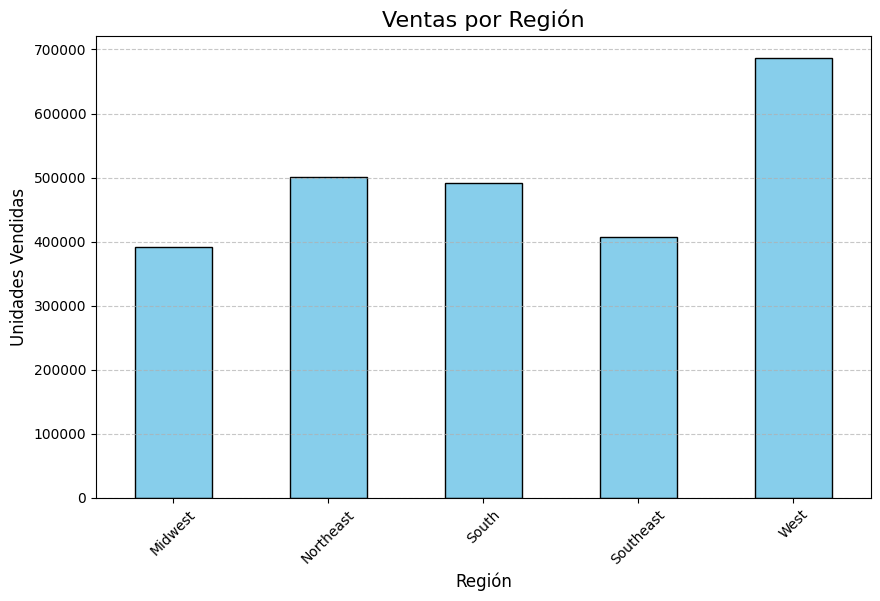

In [ ]:
# Agrupar por región y sumar las unidades vendidas
ventas_por_region = df.groupby('Region')['Units Sold'].sum()

# Crear un gráfico de barras
ventas_por_region.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.title('Ventas por Región', fontsize=16)
plt.xlabel('Región', fontsize=12)
plt.ylabel('Unidades Vendidas', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

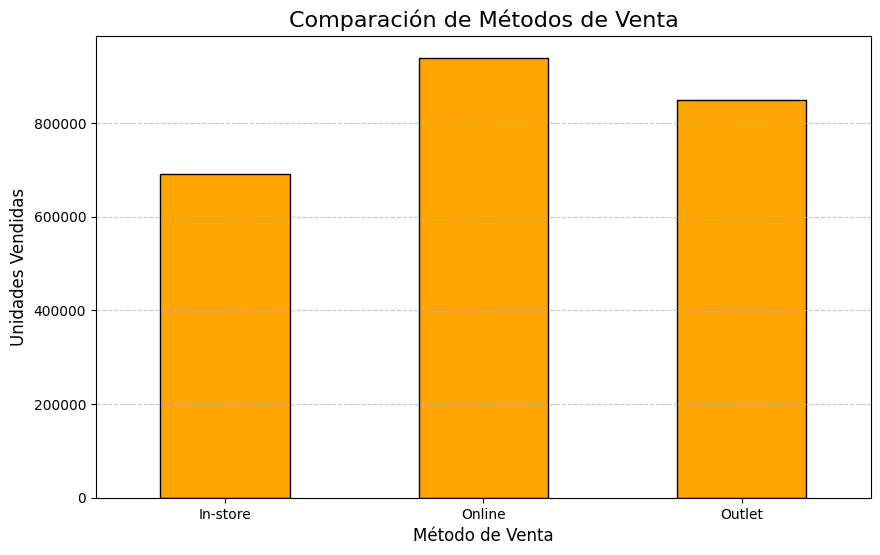

In [ ]:
# Convertir 'Units Sold' a tipo numérico
df['Units Sold'] = pd.to_numeric(df['Units Sold'], errors='coerce')

# Agrupar por método de venta y sumar las unidades vendidas
ventas_por_metodo = df.groupby('Sales Method')['Units Sold'].sum()

# Crear un gráfico de barras
ventas_por_metodo.plot(kind='bar', figsize=(10, 6), color='orange', edgecolor='black')
plt.title('Comparación de Métodos de Venta', fontsize=16)
plt.xlabel('Método de Venta', fontsize=12)
plt.ylabel('Unidades Vendidas', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

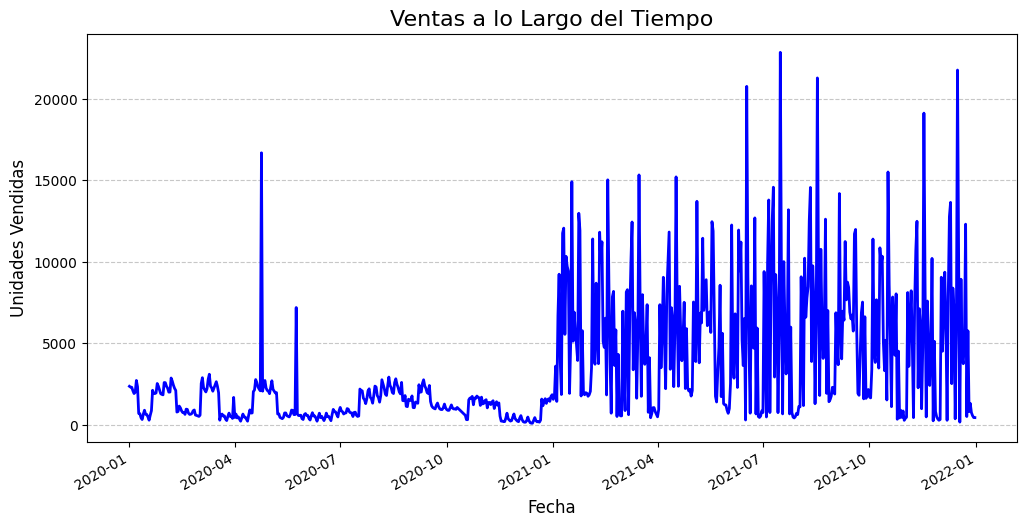

In [ ]:
# Convertir la columna 'Invoice Date' a formato de fecha
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'], errors='coerce')

# Agrupar por fecha y sumar las unidades vendidas
ventas_por_fecha = df.groupby('Invoice Date')['Units Sold'].sum()

# Crear un gráfico de línea
ventas_por_fecha.plot(kind='line', figsize=(12, 6), color='blue', linewidth=2)
plt.title('Ventas a lo Largo del Tiempo', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Unidades Vendidas', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()